In [1]:
import pandas as pd 
import numpy as np 
import pickle
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as st
PATH = "/home/WUR/katz001/PROJECTS/permit-nsti-gas"

# RFC

In [2]:
datasetTimepoint = 'ENTRY'
n_iter = 10000


resultsPath = f"{PATH}/results/50_externalValidation/{datasetTimepoint}"
folderFigures = f"{PATH}/figures/{datasetTimepoint}/50_externalValidation"

In [3]:
''' Load Data '''

with open(f'{resultsPath}/bootstrap_validation_n{n_iter}_qc.pickle', 'rb') as f:
    dic_summary = pickle.load(f)

In [4]:
# fig, ax = plt.subplots()
df = pd.DataFrame.from_dict(dic_summary).T
# df.plot.hist(bins=20, ax=ax, alpha=0.5)
# df.plot.density(ax=ax, c="grey", legend=False, bw_method=0.3, secondary_y=True)

#create 95% confidence interval for population mean weight
print(np.mean(df["auc"]),np.percentile(df["auc"], 2.5), np.percentile(df["auc"], 97.5))
print(np.mean(df["average_prec"]),np.percentile(df["average_prec"], 2.5), np.percentile(df["average_prec"], 97.5))

0.6991777729384437 0.6249939508323653 0.7685346496322105
0.6129016659766082 0.5219677562447861 0.7002544732297599


In [5]:
pd.DataFrame.from_dict(dic_summary).mean(axis=1)

auc             0.699178
average_prec    0.612902
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


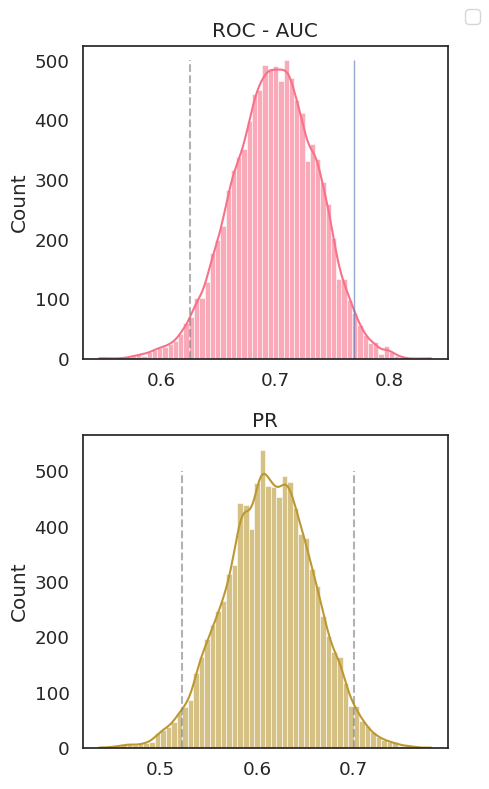

In [9]:
sns.set_theme(style="white", font_scale=1.2)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(5,8))
df = pd.DataFrame.from_dict(dic_summary).T
sns.histplot(data=df["auc"], ax=ax1, alpha=0.6, kde=True, kde_kws={"bw_adjust":0.8}, color=sns.husl_palette()[0])
sns.histplot(data=df["average_prec"], ax=ax2, alpha=0.6, kde=True, kde_kws={"bw_adjust":0.8}, color=sns.husl_palette()[1])
ax1.vlines(np.percentile(df["auc"], 2.5), ymin=0, ymax=500, linestyles='--', color='gray', alpha=0.6)
ax1.vlines(np.percentile(df["auc"], 97.5), ymin=0, ymax=500, linestyles='', alpha=0.6)
ax1.set_xlabel("")
ax2.vlines(np.percentile(df["average_prec"], 2.5), ymin=0, ymax=500, linestyles='--', color='gray', alpha=0.6)
ax2.vlines(np.percentile(df["average_prec"], 97.5), ymin=0, ymax=500, linestyles='--', color='gray', alpha=0.6)
ax1.set_xlabel("")
ax2.set_xlabel("")
ax1.set_title("ROC - AUC")
ax2.set_title("PR")
fig.legend()
plt.tight_layout()
plt.savefig(f"{folderFigures}/bootstrapping_n{n_iter}_{datasetTimepoint}.png", dpi=300)

In [ ]:
df

,auc,average_prec
0,0.705188,0.674127
1,0.770809,0.707555
2,0.750290,0.675880
3,0.722125,0.663352
4,0.690379,0.644355
...,...,...
995,0.780488,0.732103
996,0.691250,0.585968
997,0.685830,0.622377
998,0.751258,0.682072
